# Question 5.1 

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
N = 200
dim = 40
lmbda = 1/np.sqrt(N)
iteration = 100
L = 4
stepsize = 1/L

In [ ]:
np.random.seed(50)
w = np.matrix(np.random.multivariate_normal([0.0]*dim, np.eye(dim))).T
X = np.matrix(np.random.multivariate_normal([0.0]*dim, np.eye(dim), size = N))
y = X*w

In [ ]:
X[10]

matrix([[-0.2546721 ,  0.19917438, -2.53004438, -0.67761295, -0.80183918,
         -1.88500871, -0.15086424, -0.05446797, -0.88571798, -0.12239577,
         -0.35340969, -2.24934842, -1.4162453 ,  0.14208669, -0.58796602,
          0.8766029 ,  0.94420405, -0.37636415, -0.26981292, -0.32555966,
          0.3993198 , -1.03457616, -0.24496668, -0.86990688,  0.69080158,
          0.38392147, -1.59765443, -1.34621042, -0.54030531,  0.03338843,
          0.291211  ,  0.45858759, -0.87827357,  0.65997826,  0.42451178,
          0.17132399, -0.22653279,  0.50237529, -0.62934983, -1.00877622]])

In [ ]:
y[10]

matrix([[7.53040717]])

In [ ]:
def clip(beta, alpha):
    clipped = np.minimum(beta, alpha)
    clipped = np.maximum(clipped, -alpha)
    
    return clipped 

In [ ]:
def proxL1Norm(betaHat, alpha):
    penalizeAll = True
    out = betaHat - clip(betaHat, alpha)
    
    if not penalizeAll:
        out[0] = betaHat[0]
    return out

In [ ]:
def solveLasso_proxGrad(X,y, lmbda):
    maxIter = iteration # 100
    alpha = stepsize
    
    beta = np.zeros(dim)
    costFunVals = np.zeros(maxIter)
    
    for it in range(maxIter):
        
        grad = X.T @(X @ beta - y)
        beta = proxL1Norm(beta - alpha*grad, alpha*lmbda)
        
        costFunVals[it] = 0.5*np.linalg.norm(X@beta-y)**2 + lmbda*np.sum(np.abs(beta))
        
        print('Iteration ', it, 'Objective function value: ', costFunVals[it])
        
    return beta, costFunVals

In [ ]:
beta, costFunVals = solveLasso_proxGrad(X,y,lmbda)

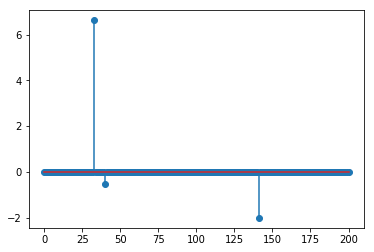

In [ ]:
plt.figure()
plt.stem(beta);

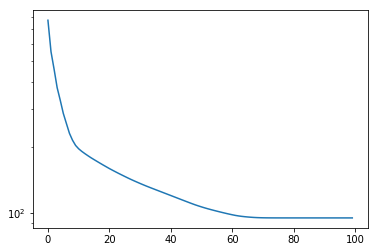

In [ ]:
plt.figure()
plt.semilogy(costFunVals);

## Own Generated Data 

Text(0.5, 1.0, 'beta (groud truth)')

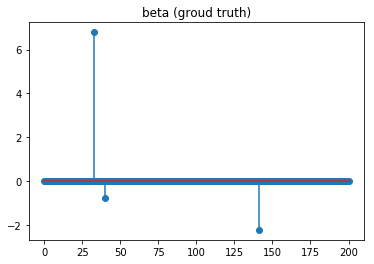

In [ ]:
np.random.seed(19)
N = 40
d = 200
nnz = 3
prm = np.random.permutation(d+1)
betaTrue = np.zeros(d+1)
betaTrue[prm[0:nnz]] = 5*np.random.randn(nnz)

X = np.random.randn(N,d)
X = np.insert(X, 0,1,axis = 1)

noise = .001*np.random.randn(N)

y = X @ betaTrue + noise

plt.stem(betaTrue)
plt.title('beta (groud truth)')

In [ ]:
X[10]

array([ 1.        ,  0.43847261,  0.18573689,  0.91598763,  0.18792399,
       -1.85224404,  0.99611467,  0.29218228, -0.82361455,  0.58260424,
       -1.66954501,  0.01715966, -1.36556125, -1.37600847,  2.40927868,
       -0.37058618, -0.16461407,  0.75958767,  1.83442338,  0.94039471,
       -0.04927458, -0.56194803,  1.3922474 , -0.7224639 ,  0.16659247,
       -0.75357354,  0.41513994,  1.83662917,  0.47690677, -0.78419489,
        0.61802061,  0.07846184,  1.2808483 ,  0.93410483, -0.13595379,
       -0.90013075,  0.42585338, -1.40009139, -1.05216769,  0.60260942,
       -1.68636029, -0.23842707,  0.40015769,  0.38143981,  0.66963214,
       -0.98703843,  0.57096046, -0.27505991,  1.21997901, -0.24311475,
        2.12146628,  2.50645832,  1.90895823,  1.35393197,  0.84010353,
       -0.27690269, -0.49520181,  1.19567662,  0.06071403, -1.44510017,
        0.1614678 , -0.98054797, -0.22522018, -0.30709595, -0.7971684 ,
        1.24284399,  0.04366724, -0.31080032, -0.35094225,  0.92

In [ ]:
y[10]

matrix([[16.81808466]])

In [ ]:
def clip(beta, alpha):
    clipped = np.minimum(beta, alpha)
    clipped = np.maximum(clipped, -alpha)
    
    return clipped 

In [ ]:
def proxL1Norm(betaHat, alpha):
    penalizeAll = True
    out = betaHat - clip(betaHat, alpha)
    
    if not penalizeAll:
        out[0] = betaHat[0]
    return out

In [ ]:
def solveLasso_proxGrad(X,y, lmbda):
    maxIter = 100
    alpha = 0.005
    
    beta = np.zeros(d+1)
    costFunVals = np.zeros(maxIter)
    
    for t in range(maxIter):
        
        grad = X.T @(X @ beta - y)
        beta = proxL1Norm(beta - alpha*grad, alpha*lmbda)
        
        costFunVals[t] = 0.5*np.linalg.norm(X@beta-y)**2 + lmbda*np.sum(np.abs(beta))
        
        print('Iteration ', t, 'Objective function value: ', costFunVals[t])
        
    return beta, costFunVals

In [ ]:
lmbda = 10

In [ ]:
beta, costFunVals = solveLasso_proxGrad(X,y,lmbda)

Iteration  0 Objective function value:  771.518390980057
Iteration  1 Objective function value:  552.2249522580435
Iteration  2 Objective function value:  458.910526844542
Iteration  3 Objective function value:  376.9967917932423
Iteration  4 Objective function value:  330.270382851581
Iteration  5 Objective function value:  286.95817654471193
Iteration  6 Objective function value:  258.0010602059525
Iteration  7 Objective function value:  232.2486983483563
Iteration  8 Objective function value:  215.86628798622397
Iteration  9 Objective function value:  204.25088832278274
Iteration  10 Objective function value:  197.1027881282075
Iteration  11 Objective function value:  191.8258920461954
Iteration  12 Objective function value:  187.3151613751046
Iteration  13 Objective function value:  183.17919006983516
Iteration  14 Objective function value:  179.28276711861506
Iteration  15 Objective function value:  175.73693089778382
Iteration  16 Objective function value:  172.3216326739573
Iter

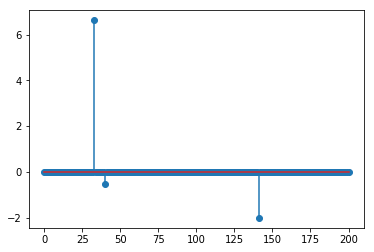

In [ ]:
plt.figure()
plt.stem(beta);

# Question 5.3

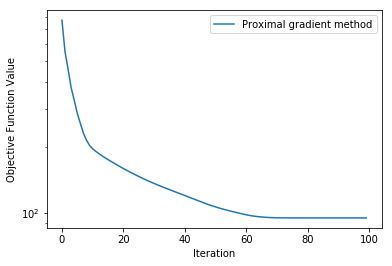

In [ ]:
plt.figure()
plt.semilogy(costFunVals, label = 'Proximal gradient method');
plt.legend();
plt.xlabel('Iteration');
plt.ylabel('Objective Function Value');